# Testing the usefulness of FFT for digit recognition
Inital classification approach taken from Scikit-learn Hand-written digit recognizion example using support vector machine calassifier http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html applied for MNIST dataset.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [36]:
from sklearn import datasets, svm, metrics, utils

Fetching the MNIST dataset

In [47]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./data')

It's 70000 examples of handwritten digits of size 28x28 pixels, labeled from 0 to 9.

The data is ordered and needs to be shuffled

In [48]:
mnist.data, mnist.target = utils.shuffle(mnist.data, mnist.target)

Pick the first 15 images for visualization

In [49]:
n_samples = len(mnist.data)

<IPython.core.display.Javascript object>


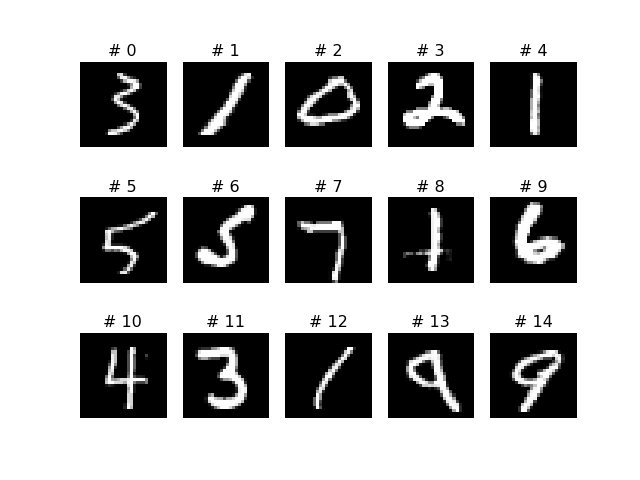

In [52]:
fig = plt.figure()
for i in range(15):
    img = mnist.data[i].reshape(28, 28)
    
    ax = fig.add_subplot(3, 5, i+1)
    ax.axis('off')
    ax.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title('# {}'.format(i))
    

Creating a support vector classifier

In [31]:
classifier = svm.SVC(gamma=0.001)

Apply learning on the first half of the digits

In [ ]:
N = n_samples//2
N = 10000
classifier.fit(mnist.data[:N], mnist.target[:N])

Predictions

In [ ]:
expected = mnist.target[N:]
predicted = classifier.predict(mnist.data[N:])